### Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import pandas as pd
from tensorflow import keras
from keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
print(tf.version.VERSION)

2.10.0


### Untarring and Saving to Local Directory

In [ ]:
fullPath = os.path.abspath("./" + "lfw.tgz")
data_lfw = keras.utils.get_file("lfw.tgz", 'file://'+ fullPath, untar=True, cache_dir=".")
dataset_dir = os.path.join(os.path.dirname(data_lfw), "lfw")

### Creating Dataset from Image Directory

In [5]:
data_dir_1 = "./datasets/face_lfw"
image_size = 256
batch_size = 128
color_bytes = 3

In [6]:
count = 0
for root_dir, cur_dir, files in os.walk(data_dir_1):
    count += len(files)
print('file count:', count)


file count: 19150


In [7]:
# Creating Train Dataset and Test Dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_1,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_size,image_size),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_1,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_size,image_size),
  batch_size=batch_size)

Found 19146 files belonging to 2 classes.
Using 15317 files for training.


2022-12-06 13:09:15.359837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 19146 files belonging to 2 classes.
Using 3829 files for validation.


In [8]:
# Printing Class Names

class_names = train_ds.class_names
print(class_names)

['faces', 'nonfaces']


### Displaying Sample Data

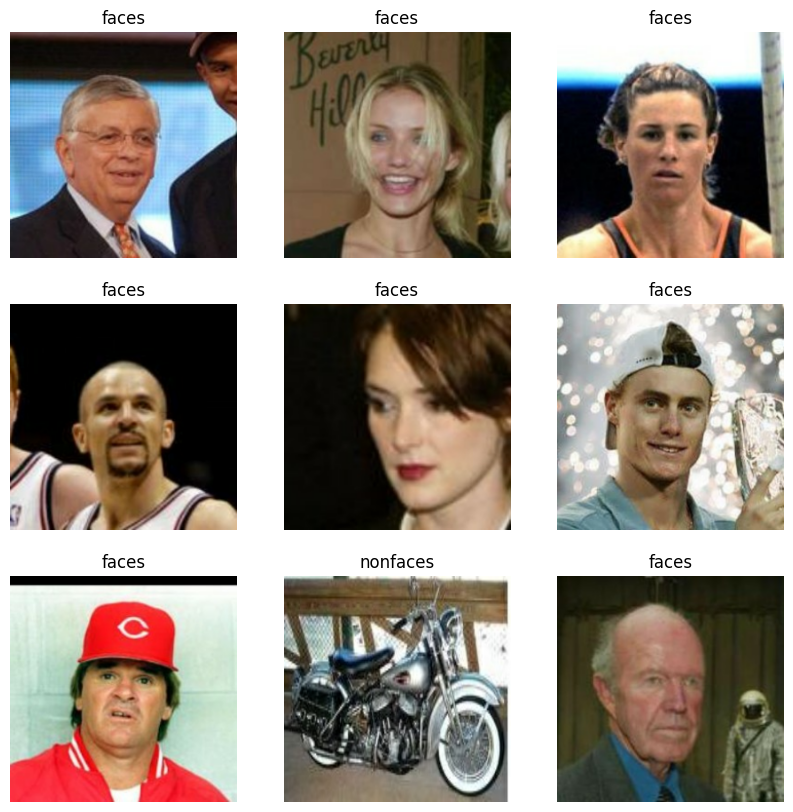

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

In [11]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [25]:
#result = self.step(batch, self.forward_only)

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

# Save the entire model as a SavedModel.
model.save('saved_model/lfw_model_base')

Epoch 1/10


2022-12-01 14:42:15.469329: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 54 of 1000
2022-12-01 14:42:25.402290: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 117 of 1000
2022-12-01 14:42:25.541055: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


120/120 [==============================] - 326s 3s/step - loss: 0.2154 - accuracy: 0.9025 - val_loss: 0.0310 - val_accuracy: 0.9882
Epoch 2/10
120/120 [==============================] - 317s 3s/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0259 - val_accuracy: 0.9919
Epoch 3/10
120/120 [==============================] - 313s 3s/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0122 - val_accuracy: 0.9958
Epoch 4/10
120/120 [==============================] - 301s 3s/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0097 - val_accuracy: 0.9963
Epoch 5/10
120/120 [==============================] - 309s 3s/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0076 - val_accuracy: 0.9976
Epoch 6/10
120/120 [==============================] - 298s 2s/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0072 - val_accuracy: 0.9966
Epoch 7/10
120/120 [==============================] - 300s 2s/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 8/10

INFO:tensorflow:Assets written to: saved_model/lfw_model_base/assets


INFO:tensorflow:Assets written to: saved_model/lfw_model_base/assets


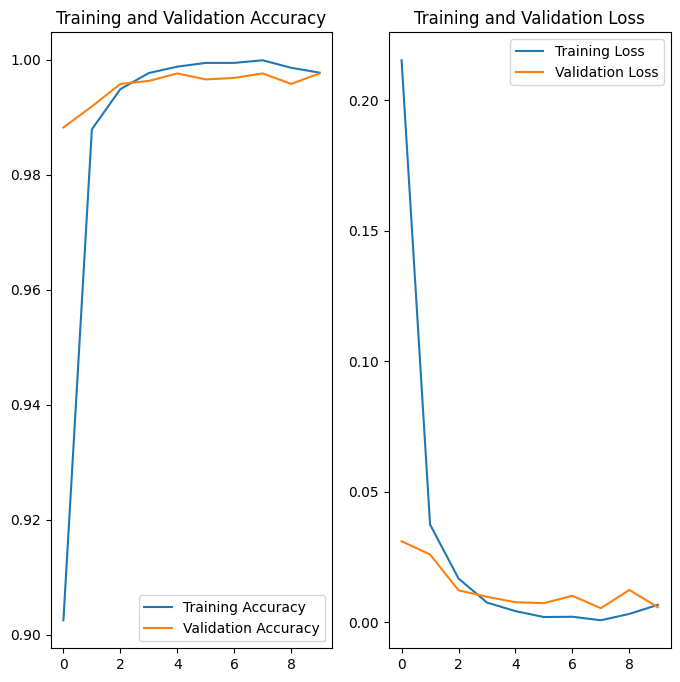

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(256,256,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

2022-12-06 13:09:56.178022: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 56 of 1000
2022-12-06 13:10:06.193258: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 99 of 1000
2022-12-06 13:10:09.375426: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


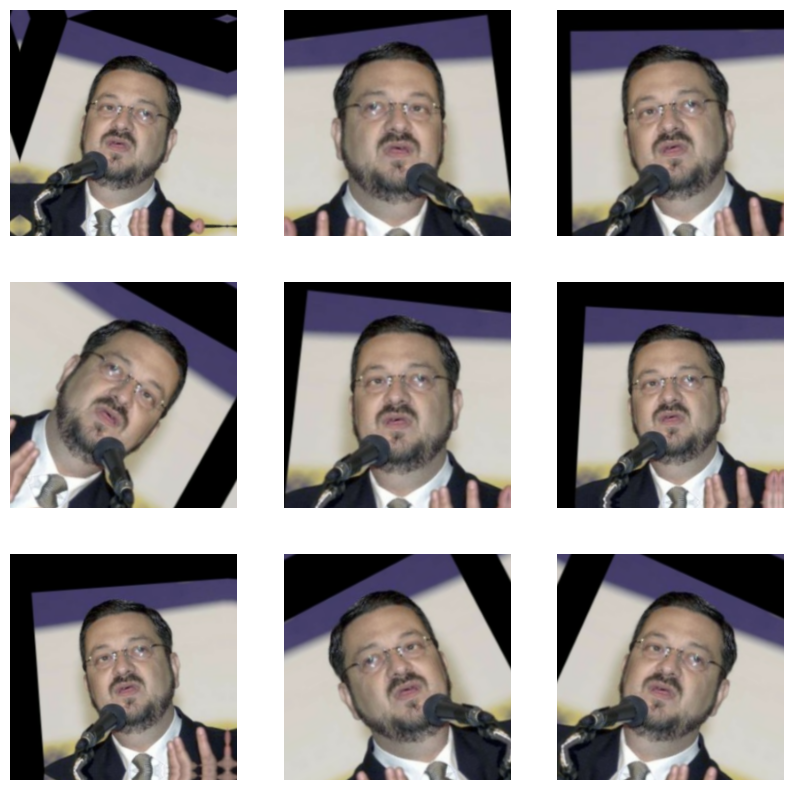

In [14]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [16]:
model_2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [17]:
model_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [18]:
epochs = 10
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
# Save the entire model as a SavedModel.
model_2.save('saved_model/lfw_model_additional')

Epoch 1/10
120/120 [==============================] - 434s 4s/step - loss: 0.3937 - accuracy: 0.8428 - val_loss: 0.0748 - val_accuracy: 0.9747
Epoch 2/10
120/120 [==============================] - 979s 8s/step - loss: 0.0668 - accuracy: 0.9777 - val_loss: 0.0397 - val_accuracy: 0.9862
Epoch 3/10
120/120 [==============================] - 427s 4s/step - loss: 0.0469 - accuracy: 0.9837 - val_loss: 0.0247 - val_accuracy: 0.9911
Epoch 4/10
120/120 [==============================] - 1158s 10s/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0205 - val_accuracy: 0.9937
Epoch 5/10
120/120 [==============================] - 417s 3s/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0141 - val_accuracy: 0.9953
Epoch 6/10
120/120 [==============================] - 409s 3s/step - loss: 0.0243 - accuracy: 0.9918 - val_loss: 0.0109 - val_accuracy: 0.9953
Epoch 7/10
120/120 [==============================] - 389s 3s/step - loss: 0.0196 - accuracy: 0.9928 - val_loss: 0.0134 - val_accuracy: 0.99

INFO:tensorflow:Assets written to: saved_model/lfw_model_additional/assets


INFO:tensorflow:Assets written to: saved_model/lfw_model_additional/assets


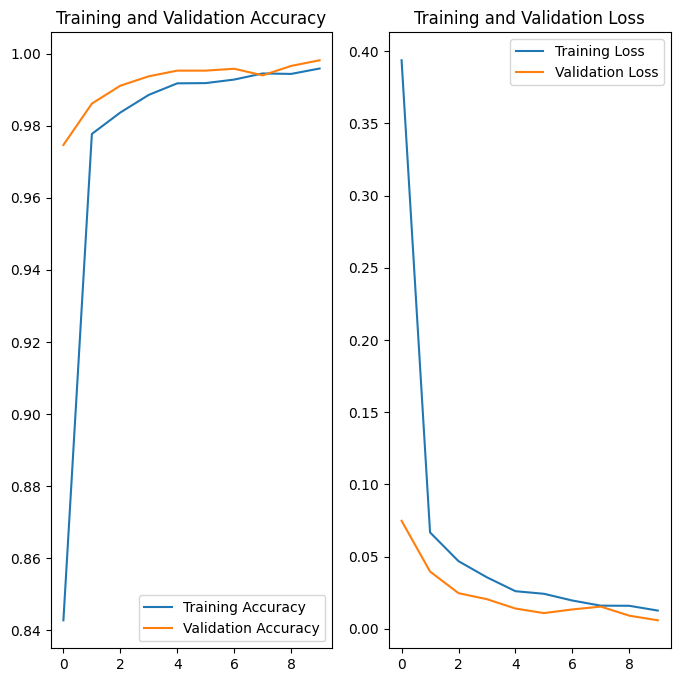

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Testing Model Accuracy

In [21]:
img_url = "https://img.freepik.com/free-photo/portrait-white-man-isolated_53876-40306.jpg"
img_path = tf.keras.utils.get_file('test_img_3', origin=img_url)

img = tf.keras.utils.load_img(
    img_path, target_size=(image_size, image_size)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_2.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_url = "https://images.unsplash.com/photo-1484591974057-265bb767ef71?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8&w=1000&q=80"
img_path = tf.keras.utils.get_file('test_img_4', origin=img_url)

img = tf.keras.utils.load_img(
    img_path, target_size=(image_size, image_size)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_2.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 330ms/step
[[-0.31489825 -3.8273492 ]]
This image most likely belongs to faces with a 97.10 percent confidence.
1/1 [==============================] - 0s 32ms/step
[[-12.893803   -0.4918079]]
This image most likely belongs to nonfaces with a 100.00 percent confidence.
